In [1]:
# %matplotlib inline
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
# from IPython.display import HTML
import matplotlib
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
# Necessary Parameters for angular Motion
R = 1
T = 2 # secs
frames = T*25
interval = 40
omega = 2*np.pi/T
# theta = np.linspace(0, 2*np.pi, 13)
# # center= np.zeros((13,2))
# x = np.cos(theta)
# plt(np.cos(x), np.sin(x), "k", lw=0.3)
def position(time=0):
    x = R*np.cos(time)
    y = R*np.sin(time)
    return {'x' : x, 'y' : y}

# def velocity(time=0,R=0.1):
#     x = -R*omega*np.sin(omega*time)**2*3
#     y = R*omega*np.cos(omega*time)**2*3
#     return {'x' : x, 'y' : y}

# def acceleration(time=0,R=0.05):
#     x = -R*(omega**2)*np.cos(omega*time)*6
#     y = -R*(omega**2)*np.sin(omega*time)*6
#     return {'x' : x, 'y' : y}

def init():
    # line.set_data([], [])
    theObject.set_data([], [])
    time_text.set_text('')
    return  theObject, time_text#line,
def animate(time):
    time /= (frames/T)
    # thisx = [0, position(time)['x'], velocity(time)['x'], acceleration(time)['x']]
    # thisy = [0, position(time)['y'], velocity(time)['y'], acceleration(time)['y']]
    # line.set_data(thisx[:2], thisy[:2])
    # theObject.set_data(thisx[1], thisy[1])
    time_text.set_text(time_template % (time))
    # ax.patches.pop(0)
    # ax.patches.pop(0)
    U_S_Start_x=0
    U_S_Start_y=0
    U_S_End_x=np.cos(time)
    U_S_End_y=np.sin(time)
    U_A_Start_x=0
    U_A_Start_y=0
    U_A_End_x=2/3*np.cos(time)
    U_A_End_y=0
    U_B_Start_x=0
    U_B_Start_y=0
    U_B_End_x=2/3*np.cos(2/3*np.pi)*np.cos(time-2/3*np.pi)
    U_B_End_y=2/3*np.sin(2/3*np.pi)*np.cos(time-2/3*np.pi)
    U_C_Start_x=0
    U_C_Start_y=0
    U_C_End_x=2/3*np.cos(4/3*np.pi)*np.cos(time+2/3*np.pi)
    U_C_End_y=2/3*np.cos(4/3*np.pi)*np.cos(time+2/3*np.pi)

    U_A_2_U_B_Start_x=U_A_End_x
    U_A_2_U_B_Start_y=U_A_End_y
    U_A_2_U_B_End_dx=U_B_End_x
    U_A_2_U_B_End_dy=U_B_End_y

    U_B_2_U_C_Start_x=U_A_2_U_B_End_x
    U_B_2_U_C_Start_y=U_A_2_U_B_End_y
    U_B_2_U_C_End_dx=U_C_End_x
    U_B_2_U_C_End_dy=U_C_End_y

    U_S = ax.add_patch(plt.Arrow(U_S_Start_x,U_S_Start_y,U_S_End_x,U_S_End_y, width = 0.05, color = 'r'))
    U_A = ax.add_patch(plt.Arrow(U_A_Start_x,U_A_Start_y,U_A_End_x,U_A_End_y, width = 0.05, color = 'r'))
    U_B = ax.add_patch(plt.Arrow(U_B_Start_x,U_B_Start_y,U_B_End_x,U_B_End_y, width = 0.05, color = 'r'))
    U_C = ax.add_patch(plt.Arrow(U_C_Start_x,U_C_Start_y,U_C_End_x,U_C_End_y, width = 0.05, color = 'r'))
    # U_A_2_U_B = ax.add_patch(plt.Arrow(U_A_2_U_B_Start_x,U_A_2_U_B_Start_y,U_A_2_U_B_End_dx,U_A_2_U_B_End_dy, width = 0.05, color = 'r'))
    # U_B_2_U_C = ax.add_patch(plt.Arrow(U_B_2_U_C_Start_x,U_B_2_U_C_Start_y,U_B_2_U_C_End_dx,U_B_2_U_C_End_dy, width = 0.05, color = 'r'))

    # print("U_A_2_U_B_Start_x = ",U_A_2_U_B_Start_x)
    # U_A = ax.add_patch(plt.Arrow(0,0,np.cos(time),np.sin(time), width = 0.1, color = 'r'))
    # accel = ax.add_patch(plt.Arrow(thisx[1],thisy[1],thisx[3],thisy[3], width = 0.1, color = 'b'))
    return  theObject, U_S, time_text,U_A,U_B,U_C#,U_A_2_U_B,U_B_2_U_C#, accel  line,  


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize = (8.0,8.0))
x = np.linspace(0, 2 * np.pi, 50)
# center= np.zeros((13,2))
# x = np.cos(theta)
ax.plot(np.cos(x), np.sin(x), "k", lw=0.3)

ax.set_xlim(( -R*2, R*2))
ax.set_ylim((( -R*2, R*2)))
ax.set_aspect('equal')
ax.grid()
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontsize = 14)  
time_text.set_text(time_template % (0))
# line, = ax.plot([0, position(0)['x']], [0, position(0)['y']],'k--')
origin, = ax.plot([0], [0], marker='o', markersize = 6, markerfacecolor = 'b')
theObject, = ax.plot([1], [1], marker = 'o', markersize = 1000, markerfacecolor = 'b')

# theObject, = ax.plot([position(0)['x']], [position(0)['x']], marker = 'o', markersize = 1000, markerfacecolor = 'b')
# U_S = ax.add_patch(plt.Arrow(position(0)['x'], position(0)['y'],  velocity(0)['x'], velocity(0)['y'], width = 0.1, color = 'r'))
U_S = ax.add_patch(plt.Arrow([0], [0],  [0], [0], width = 0.01, color = 'r'))
# accel    = ax.add_patch(plt.Arrow(position(0)['x'], position(0)['y'],  acceleration(0)['x'], acceleration(0)['y'], width = 0.1, color = 'b'))


anim = animation.FuncAnimation(fig, animate, frames = 5000,init_func=init, blit=True)#, interval = 1000
plt.show()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\j4000774\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1962, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "c:\Users\j4000774\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 861, in callit
    func(*args)
  File "c:\Users\j4000774\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\backends\_backend_tk.py", line 142, in _on_timer
    super()._on_timer()
  File "c:\Users\j4000774\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\backend_bases.py", line 1179, in _on_timer
    ret = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\j4000774\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py", line 1427, in _step
    still_going = super()._step(*args)
                  ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\j4000774\AppData\Local\Programs\Python\Py

In [2]:
# %matplotlib inline
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
# from IPython.display import HTML
import matplotlib
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
# Necessary Parameters for angular Motion
R = 1
T = 2 # secs
frames = T*25
interval = 40
omega = 2*np.pi/T
# theta = np.linspace(0, 2*np.pi, 13)
# # center= np.zeros((13,2))
# x = np.cos(theta)
# plt(np.cos(x), np.sin(x), "k", lw=0.3)
def position(time=0):
    x = R*np.cos(time)
    y = R*np.sin(time)
    return {'x' : x, 'y' : y}

# def velocity(time=0,R=0.1):
#     x = -R*omega*np.sin(omega*time)**2*3
#     y = R*omega*np.cos(omega*time)**2*3
#     return {'x' : x, 'y' : y}

# def acceleration(time=0,R=0.05):
#     x = -R*(omega**2)*np.cos(omega*time)*6
#     y = -R*(omega**2)*np.sin(omega*time)*6
#     return {'x' : x, 'y' : y}

def init():
    # line.set_data([], [])
    theObject.set_data([], [])
    time_text.set_text('')
    return  theObject, time_text#line,
def animate(time):
    time /= (frames/T)
       x = frames
    pos = np.cos(x), np.sin(x)
    line_l_start_x=0
    line_l_start_y=0
    line_l_end_x=U_m*np.cos(x)
    line_l_end_y=U_m*np.sin(x)

    line_l_U_A_start_x=0
    line_l_U_A_start_y=0
    line_l_U_A_end_x=U_m*2/3*np.cos(x)
    line_l_U_A_end_y=0
    
    line_l_U_B_start_x=0
    line_l_U_B_start_y=0
    line_l_U_B_end_x=np.cos(2/3*np.pi)*U_m*2/3*np.cos(x-2/3*np.pi)#np.abs(np.cos(2/3*np.pi))
    line_l_U_B_end_y=np.sin(2/3*np.pi)*U_m*2/3*np.cos(x-2/3*np.pi)

    line_l_U_C_start_x=0
    line_l_U_C_start_y=0
    line_l_U_C_end_x=np.cos(4/3*np.pi)*U_m*2/3*np.cos(x+2/3*np.pi)
    line_l_U_C_end_y=np.sin(4/3*np.pi)*U_m*2/3*np.cos(x+2/3*np.pi)
    
    line_l_U_A_2_U_B_start_x    = line_l_U_A_end_x
    line_l_U_A_2_U_B_start_y    = line_l_U_A_end_y
    line_l_U_A_2_U_B_end_dx     = line_l_U_B_end_x #+ 0.2 #line_l_U_B_end_x#-line_l_U_B_start_x
    line_l_U_A_2_U_B_end_dy     = line_l_U_B_end_y #+ 0.2 #line_l_U_B_end_y#-line_l_U_B_start_y
    line_l_U_B_2_U_C_start_x    = line_l_U_A_2_U_B_start_x+line_l_U_A_2_U_B_end_dx
    line_l_U_B_2_U_C_start_y    = line_l_U_A_2_U_B_start_y+line_l_U_A_2_U_B_end_dy
    line_l_U_B_2_U_C_end_dx     = line_l_U_C_end_x #+ line_l_U_C_end_x#-line_l_U_C_start_x
    line_l_U_B_2_U_C_end_dy     = line_l_U_C_end_y #+ line_l_U_C_end_y#-line_l_U_C_start_y


    line_l          = ax.add_patch(plt.Arrow(line_l_start_x,line_l_start_y,line_l_end_x,line_l_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_A      = ax.add_patch(plt.Arrow(line_l_U_A_start_x,line_l_U_A_start_y,line_l_U_A_end_x,line_l_U_A_end_y,width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_B      = ax.add_patch(plt.Arrow(line_l_U_B_start_x,line_l_U_B_start_y,line_l_U_B_end_x,line_l_U_B_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_C      = ax.add_patch(plt.Arrow(line_l_U_C_start_x,line_l_U_C_start_y,line_l_U_C_end_x,line_l_U_C_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    
    line_l_U_A_2_U_B = ax.add_patch(plt.Arrow(line_l_U_A_2_U_B_start_x,line_l_U_A_2_U_B_start_y,line_l_U_A_2_U_B_end_dx,line_l_U_A_2_U_B_end_dy,width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_B_2_U_C = ax.add_patch(plt.Arrow(line_l_U_B_2_U_C_start_x,line_l_U_B_2_U_C_start_y,line_l_U_B_2_U_C_end_dx,line_l_U_B_2_U_C_end_dy, width = 0.1))#, color = 'r', color = 'r'# works good except the arror cannot disapear
    
    # line_l_U_C = ax_u_l.add_patch(plt.Arrow(line_l_U_C_start_x,line_l_U_C_start_y,line_l_U_C_end_x,line_l_U_C_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    # line_l_U_A = ax_u_l.add_patch(plt.Arrow(line_l_U_A_start_x,line_l_U_A_start_y,line_l_U_A_end_x,line_l_U_A_end_y,width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    # line_l_U_B = ax_u_l.add_patch(plt.Arrow(line_l_U_B_start_x,line_l_U_B_start_y,line_l_U_B_end_x,line_l_U_B_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    # line_l_U_C = ax_u_l.add_patch(plt.Arrow(line_l_U_C_start_x,line_l_U_C_start_y,line_l_U_C_end_x,line_l_U_C_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear

    return  theObject, U_S, time_text,U_A,U_B,U_C,U_A_2_U_B,U_B_2_U_C#, accel  line,  


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize = (8.0,8.0))
x = np.linspace(0, 2 * np.pi, 50)
# center= np.zeros((13,2))
# x = np.cos(theta)
ax.plot(np.cos(x), np.sin(x), "k", lw=0.3)

ax.set_xlim(( -R*2, R*2))
ax.set_ylim((( -R*2, R*2)))
ax.set_aspect('equal')
ax.grid()
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontsize = 14)  
time_text.set_text(time_template % (0))
# line, = ax.plot([0, position(0)['x']], [0, position(0)['y']],'k--')
origin, = ax.plot([0], [0], marker='o', markersize = 6, markerfacecolor = 'b')
theObject, = ax.plot([1], [1], marker = 'o', markersize = 1000, markerfacecolor = 'b')

# theObject, = ax.plot([position(0)['x']], [position(0)['x']], marker = 'o', markersize = 1000, markerfacecolor = 'b')
# U_S = ax.add_patch(plt.Arrow(position(0)['x'], position(0)['y'],  velocity(0)['x'], velocity(0)['y'], width = 0.1, color = 'r'))
U_S = ax.add_patch(plt.Arrow([0], [0],  [0], [0], width = 0.01, color = 'r'))
# accel    = ax.add_patch(plt.Arrow(position(0)['x'], position(0)['y'],  acceleration(0)['x'], acceleration(0)['y'], width = 0.1, color = 'b'))


anim = animation.FuncAnimation(fig, animate, frames = 5000,init_func=init, blit=True)#, interval = 1000
plt.show()

IndentationError: unexpected indent (1976043739.py, line 42)

In [ ]:
# %matplotlib inline
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
# from IPython.display import HTML
import matplotlib
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
# Necessary Parameters for angular Motion
R = 0.6
T = 2 # secs
frames = T*25
interval = 40
omega = 2*np.pi/T
# theta = np.linspace(0, 2*np.pi, 13)
# # center= np.zeros((13,2))
# x = np.cos(theta)
# plt(np.cos(x), np.sin(x), "k", lw=0.3)
def position(time=0):
    x = R*np.cos(time)
    y = R*np.sin(time)
    return {'x' : x, 'y' : y}

# def velocity(time=0,R=0.1):
#     x = -R*omega*np.sin(omega*time)**2*3
#     y = R*omega*np.cos(omega*time)**2*3
#     return {'x' : x, 'y' : y}

# def acceleration(time=0,R=0.05):
#     x = -R*(omega**2)*np.cos(omega*time)*6
#     y = -R*(omega**2)*np.sin(omega*time)*6
#     return {'x' : x, 'y' : y}
# line_l              = ax_u_l.add_patch(plt.quiver([0], [0],  [0],[0], width = 0.01))#, color = 'r'

def init():
    # line.set_data([], [])
    theObject.set_data([], [])
    time_text.set_text('')
    return  theObject, time_text#line,
def animate(time):
    time /= (frames/T)
    # thisx = [0, position(time)['x'], velocity(time)['x'], acceleration(time)['x']]
    # thisy = [0, position(time)['y'], velocity(time)['y'], acceleration(time)['y']]
    # line.set_data(thisx[:2], thisy[:2])
    # theObject.set_data(thisx[1], thisy[1])
    time_text.set_text(time_template % (time))
    # ax.patches.pop(0)
    # ax.patches.pop(0)
    U_S = ax.add_patch(plt.quiver(0,0,np.cos(time),np.sin(time), width = 0.1, color = 'r'))
    # accel = ax.add_patch(plt.Arrow(thisx[1],thisy[1],thisx[3],thisy[3], width = 0.1, color = 'b'))
    return  theObject, U_S, time_text#, accel  line,  


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize = (8.0,8.0))
x = np.linspace(0, 2 * np.pi, 50)
# center= np.zeros((13,2))
# x = np.cos(theta)
ax.plot(np.cos(x), np.sin(x), "k", lw=0.3)

ax.set_xlim(( -R*2, R*2))
ax.set_ylim((( -R*2, R*2)))
ax.set_aspect('equal')
ax.grid()
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontsize = 14)  
time_text.set_text(time_template % (0))
# line, = ax.plot([0, position(0)['x']], [0, position(0)['y']],'k--')
origin, = ax.plot([0], [0], marker='o', markersize = 6, markerfacecolor = 'b')
theObject, = ax.plot([1], [1], marker = 'o', markersize = 1000, markerfacecolor = 'b')

# theObject, = ax.plot([position(0)['x']], [position(0)['x']], marker = 'o', markersize = 1000, markerfacecolor = 'b')
# U_S = ax.add_patch(plt.Arrow(position(0)['x'], position(0)['y'],  velocity(0)['x'], velocity(0)['y'], width = 0.1, color = 'r'))
U_S = ax.add_patch(plt.quiver([0], [0],  [0], [0], width = 0.01, color = 'r'))
# accel    = ax.add_patch(plt.Arrow(position(0)['x'], position(0)['y'],  acceleration(0)['x'], acceleration(0)['y'], width = 0.1, color = 'b'))

anim = animation.FuncAnimation(fig, animate, init_func=init, interval = interval, blit=True)#, frames = 1000
plt.show()

C:\Users\j4000774\AppData\Local\Temp\ipykernel_19100\284373272.py:75: MatplotlibDeprecationWarning: Passing argument *p* of unexpected type Quiver to add_patch which only accepts <class 'matplotlib.patches.Patch'> is deprecated since 3.5 and will become an error two minor releases later.
  U_S = ax.add_patch(plt.quiver([0], [0],  [0], [0], width = 0.01, color = 'r'))


AttributeError: 'Quiver' object has no attribute 'get_path'

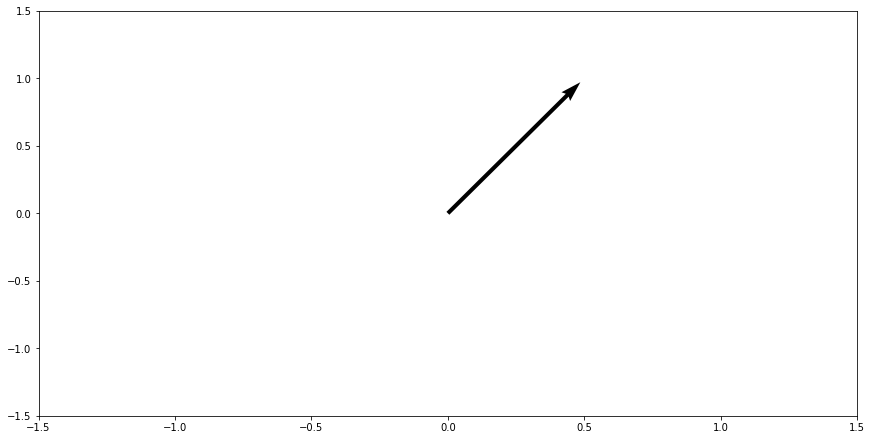

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# '''
# 10
# 0 8
# 17 80
# 6 81
# 26 43
# 63 14
# 32 48
# 41 33
# 28 70
# 50 0
# 68 87
# '''

# class point:
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y

# def cmpx(p1, p2):
#     if(p1.x==p2.x):
#         return (p1.y<p2.y)
#     return (p1.x<p2.x)

# def sort(points, cmp):
#     n = points.__len__()
#     for i in range(n):
#         for j in range(n-1):
#             if cmp(points[j], points[j+1]) == False:
#                 points[j],points[j+1] = points[j+1], points[j]

# # if __name__ == '__main__':
# 	# 输入点
#     points = [12,2]
#     n = int(input())
#     for i in range(n):
#         x, y = map(int,input().split(' '))
#         points.append(point(x, y))
        
# 	# 按xy排序
#     sort(points, cmpx)

# 	# 设置画布
#     fig = plt.figure()
#     plt.xlim(-10, 90)
#     plt.ylim(-10, 100)

# 	# 画点
#     for p in points:
#         plt.plot(p.x, p.y, "o")
		
# 	# 画箭头
#     for i in range(n-1):
#         dx = points[i+1].x - points[i].x
#         dy = points[i+1].y - points[i].y
#         plt.quiver(points[i].x, points[i].y, dx, dy, angles='xy', scale=1.03, scale_units='xy', width=0.005)
fig = plt.figure(figsize=(12, 6),constrained_layout=True)
ax_u_l = fig.add_subplot()
ax_u_l.set_xlim(-1.5,1.5)
ax_u_l.set_ylim(-1.5,1.5)
plt.quiver(0, 0, 0.5, 1, angles='xy', scale=1.03, scale_units='xy', width=0.005)

plt.show()


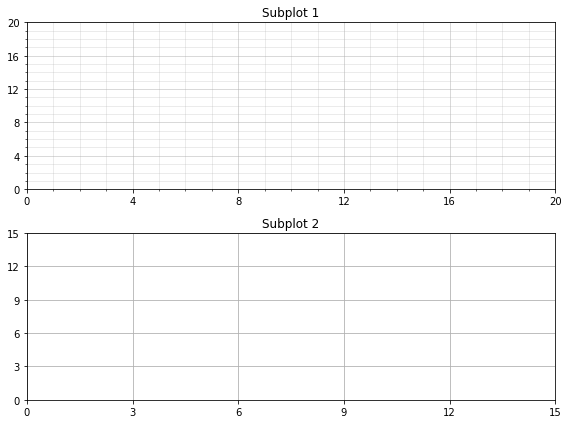

In [ ]:
import sympy as syms
import numpy as np
import matplotlib.pyplot as plt 

U_a, U_b,U_c=syms.symbols('U_a, U_b,U_c')
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(8,6))

major_ticks_top=np.linspace(0,20,6)
minor_ticks_top=np.linspace(0,20,21)

major_ticks_bottom=np.linspace(0,15,6)

axes[0].set_xticks(major_ticks_top)
axes[0].set_yticks(major_ticks_top)
axes[0].set_xticks(minor_ticks_top,minor=True)
axes[0].set_yticks(minor_ticks_top,minor=True)
axes[0].set_title("Subplot 1")
axes[0].grid(which="major",alpha=0.6)
axes[0].grid(which="minor",alpha=0.3)

axes[1].set_xticks(major_ticks_bottom)
axes[1].set_yticks(major_ticks_bottom)
axes[1].set_title("Subplot 2")
axes[1].grid()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch
import matplotlib
from sympy import *
x, y, z = symbols('x y z')
z = expand_trig(sin(x+y))
z = expand_trig(sin(x-y))
z = expand_trig(cos(x+y))
z = expand_trig(cos(x-y))
print("cos(x-y)=",sympify(z))

cos(x-y)= sin(x)*sin(y) + cos(x)*cos(y)


GridSpec(2, 4)[0:2, 0:4]


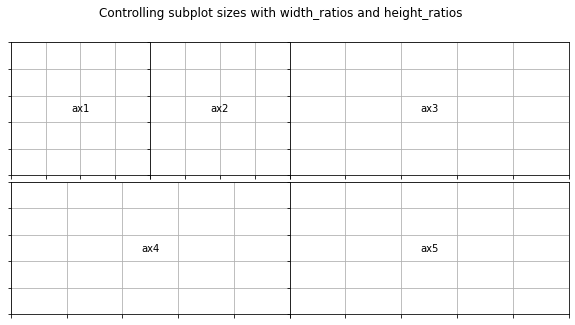

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

####################################
##--------------------------------##
###0------1------2----------------4#
##0|ax_u_l|ax_u_l|    ax_u_r      |#
###--------------------------------#
##1|    ax_d_l   |    ax_d_r      |#
###0------1------2----------------4#
##--------------------------------##
####################################
fig = plt.figure(figsize=(10, 5),constrained_layout=True)
fig.suptitle("Controlling subplot sizes with width_ratios and height_ratios")
# ,constrained_layout=True
gs = GridSpec(nrows=2,ncols=4, width_ratios=[1,1,1,1], height_ratios=[1, 1], wspace=0 ,hspace=0.05)
ax_u_l = fig.add_subplot(gs[0,0:1])
plt.grid()
ax_u_m = fig.add_subplot(gs[0,1:2],sharey=ax_u_l)
plt.grid()
ax_u_r = fig.add_subplot(gs[0,2:4],sharey=ax_u_l)
plt.grid()
ax_d_l = fig.add_subplot(gs[1,0:2],sharey=ax_u_l)
plt.grid()
ax_d_r = fig.add_subplot(gs[1,2:4],sharey=ax_u_l)
plt.grid()
# ax6 = fig.add_subplot(gs[5])
print(gs[::])
# print(ax1.get_xgridlines)
annotate_axes(fig)
plt.show()

# ax_u_l = fig.add_subplot(gs[0, 0:1])
# plt.grid()
# ax_u_m = fig.add_subplot(gs[0, 1:2],sharey=ax_u_l)
# plt.grid()
# ax_u_r = fig.add_subplot(gs[0, 2:4],sharey=ax_u_l)
# plt.grid()
# ax_d_l = fig.add_subplot(gs[1, 0:2],sharey=ax_u_l)
# plt.grid()
# ax_d_r = fig.add_subplot(gs[1, 2:4],sharey=ax_u_l)

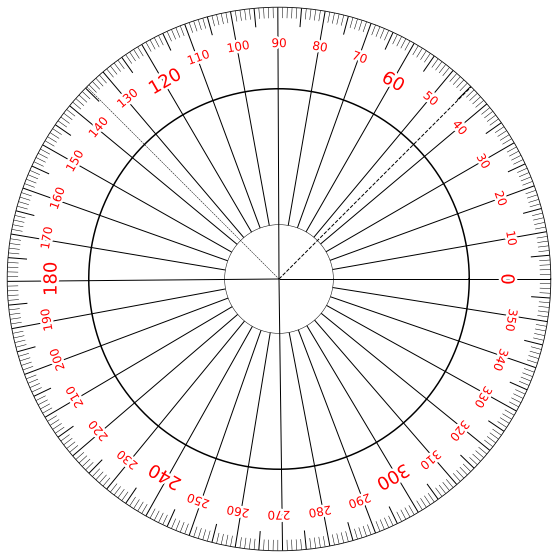

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
from matplotlib.collections import LineCollection
import numpy as np

# fig = plt.figure(
#     ncols=1,
#     # sharey=True,
#     # figsize=(6, 2),
#     figsize=(8, 8),
#     # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
# )
# ax = plt.subplot(projection='polar')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
theta_min=0
theta_max=360
r_min=0
r_max=10
ax.set_thetamin(theta_min)
ax.set_thetamax(theta_max)
ax.set_rlim(r_min, r_max)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(False)
scale = np.zeros((theta_max, 2, 2))
scale[:, 0, 0] = np.linspace(0, 2*np.pi, theta_max)  # 刻度线的角度值
scale[:, 0, 1] = 9.6  # 每度的刻度线起始点r值
scale[::5, 0, 1] = 9.3  # 每5度的刻度线起始点r值
scale[::10, 0, 1] = 2  # 每10度的刻度线起始点r值
scale[::90, 0, 1] = 0  # 90度的刻度线起始点r值
scale[:, 1, 0] = np.linspace(0, 2*np.pi, theta_max)
scale[:, 1, 1] = 10

line_segments = LineCollection(scale, linewidths=[1, 0.5, 0.5, 0.5, 0.5],
                               color='k', linestyle='solid')
ax.add_collection(line_segments)
c = np.linspace(0, 2*np.pi, 500)
ax.plot(c, [7]*c.size, color='k', linewidth=1.5)
ax.plot(c, [2]*c.size, color='k', linewidth=0.5)

ax.plot([0, np.deg2rad(45)], [0, 10],
        color='k', linestyle='--', linewidth=1)
ax.plot([0, np.deg2rad(135)], [0, 10],
        color='k', linestyle='--', linewidth=0.5)

text_kw = dict(rotation_mode='anchor',
               va='top', ha='center', color='red', clip_on=False,
               path_effects=[withStroke(linewidth=5, foreground='white')])

for i in range(0, theta_max, 10):
    theta = np.deg2rad(i)
    if theta in [0,np.pi/3,2*np.pi/3,3*np.pi/3,4*np.pi/3,5*np.pi/3]:
        ax.text(theta, 8.7, i,rotation=i-90, fontsize=18, **text_kw)
        continue
    ax.text(theta, 8.9, i, rotation=i-90, fontsize=12, **text_kw)
    # ax.text(theta, 7.9, 180-i, rotation=i-90, fontsize=12, **text_kw)


plt.show()

In [ ]:
88.17/2
43.95*2


87.9